# Numerical solution for a single pendulum

## The differential equation of the single pendulum reformatted

The differential equation of the single pendulum is a non-linear second-order DE of the following form:

$\dfrac{d^{2}\theta}{dt^{2}} = -mg\sin(\theta).$

We write this as a system of coupled first order differential equations:

\begin{equation}
\begin{split}
\dfrac{d\theta_0}{dt} &= \theta_{1}, \\
\dfrac{d\theta_1}{dt} &= -mg\theta_{0}.
\end{split}
\end{equation}\par

If we then put $\theta_{0}$ and $\theta_{1}$ into a vector (let's call that $\overrightarrow{y}$, so $\overrightarrow{y} = \begin{bmatrix} \theta_{0} \\ \theta_{1}\end{bmatrix}$) we get:


\begin{equation}
\frac{d}{dt}\overrightarrow{y} = \begin{bmatrix}f_0(\theta_{0},\theta_{1},t) \\ f_1(\theta_{0},\theta_{1},t)\end{bmatrix} = \overrightarrow{f}(\theta_{0},\theta_{1},t).
\end{equation}
with
\begin{equation}
\begin{split}
f_0(\theta_{0},\theta_{1},t) &= \theta_{1}, \\
f_1(\theta_{0},\theta_{1},t) &= -mg\theta_{0}.
\end{split}
\end{equation}

Or, in other words, we now have the single first-order vector-differential equation:

\begin{equation}
\frac{d}{dt}\overrightarrow{y} = \overrightarrow{f}(\overrightarrow{y},t).
\end{equation}

We can now use Runge-Kutta methods to compute $\overrightarrow{y}(t)$ at discretized timesteps as a function of the previous timestep(s). The most basic of these methods is the first-order Runge-Kutta method, also known as the Euler method:

\begin{equation}
\overrightarrow{y}[n+1] \approx \overrightarrow{y}[n]+\Delta t * \overrightarrow{f}[n],
\end{equation}
with $\Delta t$ the length of each time step.

$\overrightarrow{y}(n)$ is now easily computed in a for loop:

In [66]:
## Import various functions
import numpy as np
from math import log10
import matplotlib.pyplot as plt
################################################################
## Set various parameters and the initial conditions

## Define the physical parameters
# Define the mass of the bob
m = 0.2 # kg

# Define the length of the pendulum
l = 0.5 # m

# Define the gravitational constant
g = 9.81 # m/s^2


## Define simulation parameters
# Set the length of each time step
dt = 0.1 #sec
# Set the total length of the simulation
t_tot = 5

#################################################################
# Compute the total number of steps and the proper time that is a multiple of dt
N_tot = int(t_tot/dt)
t_act = dt * N_tot

# Make the time vector t
t = [np.round(x*dt,np.int(-np.floor(log10(dt)))) for x in range(N_tot+1)]



# Pre-allocate y
y_all = np.zeros((2,N_tot+1))


In [67]:
## Define the function f and the initial conditions
# Define f(y,t)
def f(y,m,g):
    '''Computes the function f(y,t) = [f_0,f_1] in the system of 1st order DE y'(t) = f(y,t); with f_0 = y[1] and f_1 = -mgsin(f_0). '''
    f_0 = y[1]
    f_1 = -1*m*g*np.sin(y[0])
    return np.array([f_0,f_1])

# Set the inital angle th[0] and radial velocity d/dt th[0]:
th0 = 0.3 # rad
v0 = 0 # rad/s
y_all[:,0] = np.array([th0,v0])


In [68]:
## Perform the simulation
for n in range(N_tot):
    y_all[:,n+1] = y_all[:,n]+dt*f(y_all[:,n],m,g)

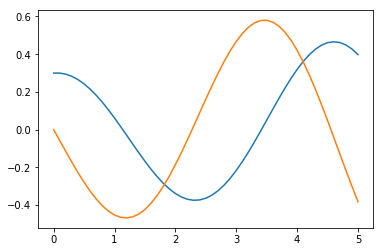

In [69]:
plt.plot(t,y_all[0,:])
plt.plot(t,y_all[1,:])

This algoritm is very simple but one needs a relatively large step size. Therefore, we can change to a new algoritm, the fourth-order (or simply \textit{the}) Runge-Kutta method. We again have the following (system of) differential equations:

\begin{equation}
\frac{d}{dt}\overrightarrow{y} = \overrightarrow{f}(\overrightarrow{y},t).
\end{equation}

We again discretize $\overrightarrow{y}(t)$, but now calculate $\overrightarrow{y}(n+1)$ as follows:
\begin{equation}
\overrightarrow{y}(n+1) = \overrightarrow{y}(n) + \frac{1}{6}\left(k_{1} + 2k_{2} + 2k_{3}+k_{4}\right),
\end{equation}
with:
\begin{equation}
\begin{split}
k_{1} &= dt*\overrightarrow{f}(\overrightarrow{y}[n],t[n]) \\
k_{2} &= dt*\overrightarrow{f}(\overrightarrow{y}[n]+\frac{k_{1}}{2},t[n]+\frac{dt}{2}) \\
k_{3} &= dt*\overrightarrow{f}(\overrightarrow{y}[n]+\frac{k_{2}}{2},t[n]+\frac{dt}{2}) \\
k_{4} &= dt*\overrightarrow{f}(\overrightarrow{y}[n]+k_{3},t[n]+dt). \\
\end{split}
\end{equation}

What this essentially does is that it updates the estimated slope of the function and taking the average of the different updates. The Euler method is essentially using only $k_{1}$.

In [70]:
## Implement the R-K-4 method to calculate y:
y_all_RK4 = np.zeros_like(y_all) # Preallocate new variable
y_all_RK4[:,0] = y_all[:,0] # Enter the same initial conditions

# Implement the new algoritm
for n in range(N_tot):
    # Calculate the different k's
    k1 = dt*f(y_all_RK4[:,n],m,g)
    k2 = dt*f(y_all_RK4[:,n]+k1/2,m,g)
    k3 = dt*f(y_all_RK4[:,n]+k2/2,m,g)
    k4 = dt*f(y_all_RK4[:,n]+k3,m,g)
    
    # Calculate y[n+1]
    y_all_RK4[:,n+1] = y_all_RK4[:,n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

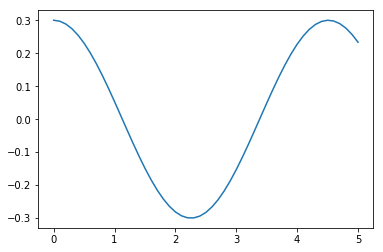

In [71]:
plt.plot(t,y_all_RK4[0,:])